# Sentiment Classifier for Rotten Tomatoes Movie Reviews

## I. Cleaning and Preprocessing

In [1]:
# When using Google Colab
#try:
#    from google.colab import drive
#    drive.mount('/content/drive', force_remount=True)
#    COLAB = True
#    print("Note: using Google CoLab")
#    %tensorflow_version 2.x
#except:
#    print("Note: not using Google CoLab")
#    COLAB = False

In [2]:
import pandas as pd
import numpy as np

import os
import time

import matplotlib.pyplot as plt
import seaborn as sns
#plt.style.use('dark_background') # For dark backround style
plt.style.use(style="seaborn")
%matplotlib inline

# Import custom preprocessing functions
import sys
sys.path.insert(0, 'modules/')
from data_preprocessing import *

# NLP
from nltk.tokenize import word_tokenize
import nltk


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jonas.MSI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jonas.MSI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### The Rotten Tomatoes Movie Review Dataset


The Rotten Tomatoes movies and critic reviews dataset was obtained from [Kaggle](https://www.kaggle.com/stefanoleone992/rotten-tomatoes-movies-and-critic-reviews-dataset).

I will be using primarily the crisics dataset as it contains the movie reviews of both critics and non-critics. the critics dataset each record represents a critic review published on Rotten Tomatoes, with the URL used for the scraping, critic name, review publication, date, score, and content.

In [4]:
df = pd.read_csv('../data/rotten_tomatoes/rotten_tomatoes_critic_reviews.csv', encoding='utf-8')

# In Google Colab
#df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/final-project/data/rotten_tomatoes/rotten_tomatoes_critic_reviews.csv', encoding='utf-8')

In [5]:
movies = pd.read_csv('../data/rotten_tomatoes/rotten_tomatoes_movies.csv', encoding='utf-8')

# In Google Colab
#movies = pd.read_csv('/content/drive/My Drive/Colab Notebooks/final-project/data/rotten_tomatoes/rotten_tomatoes_movies.csv', encoding='utf-8')

Let's take a peek at the `movies` dataframe.

In [6]:
movies.head()

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3


In [8]:
movies.columns

Index(['rotten_tomatoes_link', 'movie_title', 'movie_info',
       'critics_consensus', 'content_rating', 'genres', 'directors', 'authors',
       'actors', 'original_release_date', 'streaming_release_date', 'runtime',
       'production_company', 'tomatometer_status', 'tomatometer_rating',
       'tomatometer_count', 'audience_status', 'audience_rating',
       'audience_count', 'tomatometer_top_critics_count',
       'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count'],
      dtype='object')

In [9]:
movies.tomatometer_status.unique()

array(['Rotten', 'Certified-Fresh', 'Fresh', nan], dtype=object)

In [38]:
movies.movie_title.nunique()

17106

In [36]:
df.head()

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff..."
2,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,With a top-notch cast and dazzling special eff...
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...
4,m/0814255,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,2010-02-10,What's really lacking in The Lightning Thief i...


In [29]:
df[df.top_critic == True]['top_critic'].count() / df.shape[0] * 100

25.533775155595006

In [30]:
df[df.top_critic == False]['top_critic'].count() / df.shape[0] * 100

74.46622484440499

In [31]:
df.isna().sum() / df.shape[0] * 100

rotten_tomatoes_link     0.000000
critic_name              1.639710
top_critic               0.000000
publisher_name           0.000000
review_type              0.000000
review_score            27.073575
review_date              0.000000
review_content           5.823452
dtype: float64

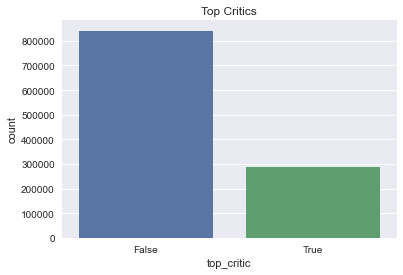

In [47]:
sns.countplot(x='top_critic', data=df).set(title='Top Critics')
plt.savefig('../output/img/top-critics.jpg')
plt.show()


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1130017 entries, 0 to 1130016
Data columns (total 8 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   rotten_tomatoes_link  1130017 non-null  object
 1   critic_name           1111488 non-null  object
 2   top_critic            1130017 non-null  bool  
 3   publisher_name        1130017 non-null  object
 4   review_type           1130017 non-null  object
 5   review_score          824081 non-null   object
 6   review_date           1130017 non-null  object
 7   review_content        1064211 non-null  object
dtypes: bool(1), object(7)
memory usage: 61.4+ MB


Let's filter out only the `review_content` and `review_type` columns as these are what we'll need.

In [12]:
reviews = df.copy()[['review_content', 'review_type']]

In [13]:
reviews.rename(columns = {'review_content':'Text', 'review_type':'Type'}, inplace = True)

Let's check for missing values.

In [14]:
reviews.isna().sum()

Text    65806
Type        0
dtype: int64

In [15]:
reviews.isna().sum() / reviews.shape[0] * 100

Text    5.823452
Type    0.000000
dtype: float64

We will remove the missing values.

In [16]:
reviews.drop_duplicates(subset=['Text'],inplace=True)  #dropping duplicates
reviews.dropna(axis=0,inplace=True)

In [17]:
reviews.isna().sum() / reviews.shape[0] * 100

Text    0.0
Type    0.0
dtype: float64

We can visualize the composition of Fresh vs Rotten ratings through the plot below:

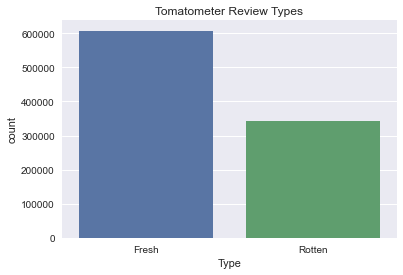

In [46]:
sns.countplot(x='Type', data=reviews).set(title='Tomatometer Review Types')
plt.savefig('../output/img/review-types.jpg')
plt.show()

In [56]:
reviews_fresh_percentage = (reviews['Type'] == 'Fresh').sum() / reviews.shape[0] * 100
reviews_rotten_percentage = (reviews['Type'] == 'Rotten').sum() / reviews.shape[0] * 100
print(f'Percentage of Fresh Reviews: {reviews_fresh_percentage:.2f}%')
print(f'Percentage of Rotten Reviews: {reviews_rotten_percentage:.2f}%')

Percentage of Fresh Reviews: 63.99%
Percentage of Rotten Reviews: 36.01%


### Text Cleaning

These text cleaning steps will be applied:

- Applying Lower Case
- Removing URLs, HTML, Emojis, Punctuations and Stop Words
- Contraction Mapping (e.g. isn't = is not)
- Lemmatization

In [40]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jonas.MSI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jonas.MSI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [58]:
reviews["Text"] = reviews["Text"].map(lambda x: lowercase(x))
reviews["Text"] = reviews["Text"].map(lambda x: remove_URL(x))
reviews["Text"] = reviews["Text"].map(lambda x: remove_html(x))
reviews["Text"] = reviews["Text"].map(lambda x: contraction_mapping(x))
reviews["Text"] = reviews["Text"].map(lambda x: remove_emoji(x))
reviews["Text"] = reviews["Text"].map(lambda x: remove_punct(x))
reviews["Text"] = reviews["Text"].map(lambda x: remove_stopwords(x))
#reviews["Text"] = reviews["Text"].map(remove_stopwords)
reviews["Text"] = reviews["Text"].map(lambda x: lemmatizer(x))

In [57]:
for review in reviews.Text[0:20]:
    print(review)

A fantasy adventure that fuses Greek mythology to contemporary American places and values. Anyone around 15 (give or take a couple of years) will thrill to the visual spectacle
Uma Thurman as Medusa, the gorgon with a coiffure of writhing snakes and stone-inducing hypnotic gaze is one of the highlights of this bewitching fantasy
With a top-notch cast and dazzling special effects, this will tide the teens over until the next Harry Potter instalment.
Whether audiences will get behind The Lightning Thief is hard to predict. Overall, it's an entertaining introduction to a promising new world -- but will the consuming shadow of Potter be too big to break free of?
What's really lacking in The Lightning Thief is a genuine sense of wonder, the same thing that brings viewers back to Hogwarts over and over again.
It's more a list of ingredients than a movie-magic potion to enjoy from start to finish.
Harry Potter knockoffs don't come more transparent and slapdash than this wannabe-franchise jump

In [59]:
for review in reviews.Text[0:20]:
    print(review)

fantasy adventure fuse greek mythology contemporary american place value anyone around 15 give take couple year thrill visual spectacle
uma thurman medusa gorgon coiffure writhing snake stoneinducing hypnotic gaze one highlight bewitching fantasy
topnotch cast dazzling special effect tide teen next harry potter instalment
whether audience get behind lightning thief hard predict overall entertaining introduction promising new world consuming shadow potter big break free
really lacking lightning thief genuine sense wonder thing brings viewer back hogwarts
list ingredient moviemagic potion enjoy start finish
harry potter knockoff come transparent slapdash wannabefranchise jumpstarter directed chris columbus
percy jackson great movie good one trotting kernel greek mythology like many disney channel reference
fun brisk imaginative
crammed dragon setdestroying fight thing exploding columbus squeeze wellmeaning pause break friendship absent father swiftly moving next pyrotechnic display
actio

In [60]:
reviews.head(20)

,Text,Type
0,fantasy adventure fuse greek mythology contemp...,Fresh
1,uma thurman medusa gorgon coiffure writhing sn...,Fresh
2,topnotch cast dazzling special effect tide tee...,Fresh
3,whether audience get behind lightning thief ha...,Fresh
4,really lacking lightning thief genuine sense w...,Rotten
5,list ingredient moviemagic potion enjoy start ...,Rotten
6,harry potter knockoff come transparent slapdas...,Rotten
7,percy jackson great movie good one trotting ke...,Fresh
8,fun brisk imaginative,Fresh
9,crammed dragon setdestroying fight thing explo...,Fresh


There are two rating types: Fresh and Rotten. Since this is binary classification, we can encode these into number labels to prepare them for processing. We will encode the values of "Fresh" as 1 and "Rotten" as 0.

In [21]:
reviews['Type'] = reviews['Type'].apply(lambda x: 1 if x == 'Fresh' else 0)

In [33]:
#from sklearn import preprocessing
#le = preprocessing.LabelEncoder()
#reviews['Type']= le.fit_transform(reviews['Type'])

In [22]:
reviews

,Text,Type
0,fantasy adventure fuse greek mythology contemp...,1
1,uma thurman medusa gorgon coiffure writhing sn...,1
2,topnotch cast dazzling special effect tide tee...,1
3,whether audience get behind lightning thief ha...,1
4,really lacking lightning thief genuine sense w...,0
...,...,...
1130008,rousing reconstruction 1879 battle rorkes drift,1
1130013,seen today startling indictment british imperi...,1
1130014,rousing visual spectacle prequel cy endfield d...,1
1130015,simple twoact story prelude war war former con...,0


Let's save the dataframe into a csv file for modeling later.

In [23]:
reviews.to_csv("../data/rotten_tomatoes/reviews_clean.csv", index=False)